In [45]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

# loading data
data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(func=(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills))

In [46]:
# df_us 
df_us = df[df["job_country"].isin(["United States"])].copy()

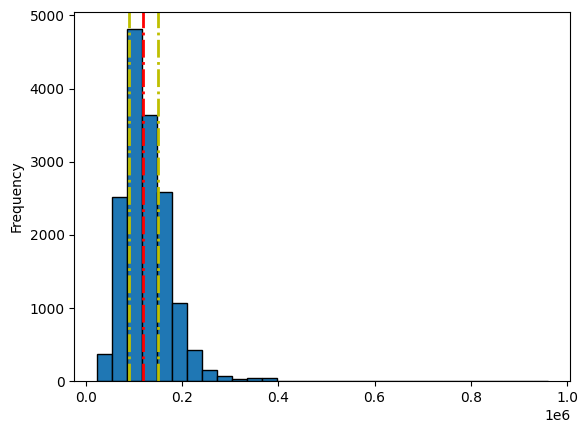

In [47]:
q1 = df_us["salary_year_avg"].quantile(0.25)
q2 = df_us["salary_year_avg"].quantile(0.50)
q3 = df_us["salary_year_avg"].quantile(0.75)

ax = df_us.loc[:,"salary_year_avg"].dropna().plot(kind="hist", bins=30, edgecolor='black')
ax.axvline(x=q2, color="r", ls="-.", lw=2)
ax.axvline(x=q1, color="y", ls="-.", lw=2)
ax.axvline(x=q3, color="y", ls="-.", lw=2)
# ax.axvline(x=q1-, color="y", ls="-.", lw=2)

# Box Plot

In [51]:
titles = df_us.job_title_short.value_counts().head(3).index.to_list()
titles

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [57]:
df_us_boxplot = df_us[df_us["job_title_short"].isin(titles)].dropna(subset=["salary_year_avg"])

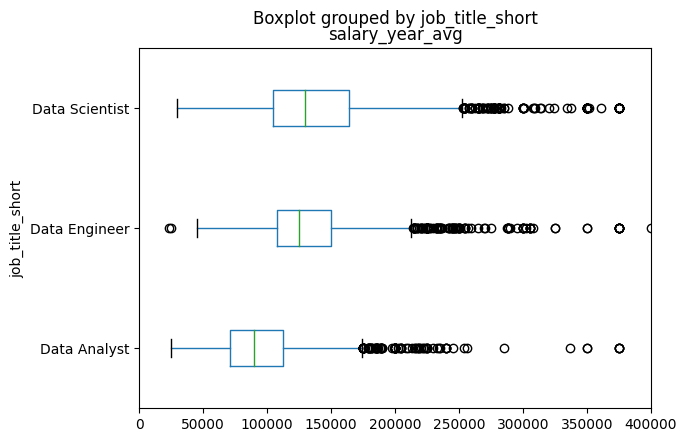

In [100]:
fig, ax = plt.subplots()
df_us_boxplot.boxplot(column="salary_year_avg", by="job_title_short", vert=False, grid=False, ax=ax)
ax.set_xlim(left=0,right=400000)
# plt.xlim([0,0.8])
plt.show()